In [1]:
%matplotlib inline
import os
os.chdir("..")
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
from math import log
import random
import time
import pickle
from numpy.linalg import pinv
from arm_class import ArmGaussian
from LinUCB_class import PolicyLinUCB
from dLinUCB_class import DynamicLinUCB
from D_LinUCB_class import DLinUCB
from SW_LinUCB_class import SWLinUCB
from environment_class import Environment
from simulator_class import Simulator
from utils import plot_regret, scatter_abrupt, scatter_smooth, action_check, get_B_T_smooth, detection_sorted

In [2]:
# General parameters for all the experiments
delta = 0.01 # Probability of being outside the confidence interval
s = 1  # Bound on the theta_star parameter
lambda_ = 0.1 # Regularisation parameter
q = 5 # Diplaying the quantile (in %)

In [3]:
def experiment_smooth(n_mc, option):
    mab = Environment(d, theta, sigma_noise, verbose)
    simulator = Simulator(mab, theta, policies, k, d, steps, {}, verbose)
    if option == "par":
        print('n_process:', n_process)
        print('Step1:', step_1)
        print("steps:", steps)
        print("n_mc:", n_mc)
        print("Angle Init:", angle_init)
        print("Angle End:", angle_end)
        print("q:", q)
        avgRegret, qRegret, QRegret = simulator.run_multiprocessing_smooth(n_process, step_1, steps, 
                                                                           n_mc, R, angle_init, angle_end,
                                                                           q, t_saved)
        return avgRegret, qRegret, QRegret
    else:
        avgRegret, qRegret, QRegret, timedic, theta_true, theta_hat = simulator.run_smooth_environment(step_1, steps, 
                                                                                n_mc, q, R, angle_init, angle_end,
                                                                                n_scat, n_scat_true,
                                                                                t_saved)
        return avgRegret, qRegret, QRegret, timedic, theta_true, theta_hat

def data_from_experiment_smooth(n_mc, option):
    if option == "par":
        avgRegret, qRegret, QRegret = experiment_smooth(n_mc, option)
        data = [[policy, avgRegret[policy], qRegret[policy],
                QRegret[policy]] for policy in avgRegret]
        return data
    else:    
        avgRegret, qRegret, QRegret, timedic, theta_true, theta_hat = experiment_smooth(n_mc, option)
        data = [[policy, avgRegret[policy], qRegret[policy],
                QRegret[policy]] for policy in avgRegret]
        return data, theta_hat, theta_true, timedic

In [4]:
# The saved files should be located in the saved/ folder
# The output images would be located in the out/ folder
# If the folders are not created they must be created to run the code without bugs

path = os.getcwd()
out_dir = 'out_SLOW_NEW'
saved_data_path = 'saved_SLOW_NEW'
detection_folder = 'detection_out_SLOW_NEW'

if not os.path.exists(path + '/' + out_dir):
    os.mkdir(path + '/' + out_dir)
    print('Creating the folder %s' %out_dir)
else:
    print("%s already exists" %out_dir)
    
if not os.path.exists(path + '/' + saved_data_path):
    os.mkdir(path + '/' + saved_data_path)
    print('Creating the folder %s' %saved_data_path)
else:
    print("%s already exists" %saved_data_path)
    
if not os.path.exists(path + '/' + detection_folder):
    os.mkdir(path + '/' + detection_folder)
    print('Creating the folder %s' %detection_folder)
else:
    print("%s already exists" %detection_folder)

Creating the folder out_SLOW_NEW
Creating the folder saved_SLOW_NEW
Creating the folder detection_out_SLOW_NEW


In [5]:
def save_file(filename, var):
    with open(saved_data_path + '/' + str(filename) + '.pkl', 'wb') as f:
        pickle.dump(var, f)
def load_file(filename):
    with open(saved_data_path + '/' + str(filename) + '.pkl', 'rb') as f:
        res = pickle.load(f)
        return res

def save_file_from_folder(folder, filename, var):
    with open(str(folder) + '/' + str(filename) + '.pkl', 'wb') as f:
        pickle.dump(var, f)
def load_file_from_folder(folder, filename):
    with open(str(folder) + '/' + str(filename) + '.pkl', 'rb') as f:
        res = pickle.load(f)
        return res

## Smoothly changing environment

In [6]:
# PARAMETERS
d = 2 # Dimension of the problem
k = 50 # Number of arms available at each step

# Steps_part
step_1 = 3000 # number of steps for the smooth modification
steps = 6000 # for the scatter plot only -> total number of steps
steps_calibration = 6000


n_scat = 400
n_scat_true = 300
t_saved = None # Saving the entire trajectory

# The following commented lines allow to save only some points on the trajectory
# number_t_saved = steps//10
# t_saved = np.int_(np.linspace(0, steps - 1, number_t_saved))

alpha = 1
sigma_noise = 1

verbose = False
q = 5 # 5 percent quantiles used
R = 1 # True parameter evolving on the unit circle

angle_init = 0
angle_end = np.pi/2

B_T = get_B_T_smooth(step_1, R, angle_init, angle_end, d)
print('B_T value:', B_T)
print('Sigma value for the experimenxt:', sigma_noise)

theta = np.array([1,  0]) # Starting point of the unknown parameter
bp = {} # No breakpoints but continuous changes

gamma  = 1 - (B_T/(d*steps_calibration))**(2/3) # Optimal Value to minimize the asymptotical regret
tau = (d*steps_calibration/B_T)**(2/3) # Optimal Value to minimize the asymptotical regret

    
policies = [DLinUCB(d, delta, alpha, lambda_, s, gamma, '', sm = False, sigma_noise = sigma_noise, verbose=verbose),
            SWLinUCB(d, delta, alpha, lambda_, s, tau, '', sm=False, sigma_noise=sigma_noise, verbose=verbose),
            DynamicLinUCB(d, delta, alpha, lambda_, s, tau=200, name='',filename = 'smooth_exp_final',
                          sm=True, sigma_noise = sigma_noise, delta_2=0.01, tilde_delta=0.002, verbose=False, 
                          omniscient=False),
            PolicyLinUCB(d, delta, alpha, lambda_, s, '', sm = True, sigma_noise = sigma_noise, verbose=verbose)
           ]

B_T value: 1.5702727100817697
Sigma value for the experimenxt: 1


In [8]:
# Small experiment with 2 repetitions
data_2, hat_2, true_2, time_2 = data_from_experiment_smooth(n_mc=2, option = '')


  0%|          | 0/2 [00:00<?, ?it/s]

0 D-LinUCB [0. 0.] [1. 0.]
400 D-LinUCB [1.01133573 0.18556515] [0.9781476  0.20791169]
800 D-LinUCB [0.93369855 0.39209898] [0.91354546 0.40673664]
1200 D-LinUCB [0.88746193 0.44954802] [0.80901699 0.58778525]
1600 D-LinUCB [0.73013887 0.56487292] [0.66913061 0.74314483]
2000 D-LinUCB [0.57627513 0.83381591] [0.5       0.8660254]
2400 D-LinUCB [0.51605786 0.80745474] [0.30901699 0.95105652]
2800 D-LinUCB [0.3724878 0.9001658] [0.10452846 0.9945219 ]
3200 D-LinUCB [0.17422518 0.9613142 ] [6.123234e-17 1.000000e+00]
3600 D-LinUCB [0.04873344 1.02854204] [6.123234e-17 1.000000e+00]
4000 D-LinUCB [0.10831126 0.97845819] [6.123234e-17 1.000000e+00]
4400 D-LinUCB [0.02206719 1.00112908] [6.123234e-17 1.000000e+00]
4800 D-LinUCB [0.08431288 0.97651147] [6.123234e-17 1.000000e+00]
5200 D-LinUCB [0.12034885 0.97793332] [6.123234e-17 1.000000e+00]
5600 D-LinUCB [-0.00831593  1.01239535] [6.123234e-17 1.000000e+00]
0 SW-LinUCB [0. 0.] [1. 0.]
400 SW-LinUCB [0.86976525 0.07786806] [0.9781476  0.2


100%|██████████| 2/2 [00:37<00:00, 18.77s/it]


-- Building data out of the experiments ---
--- Data built ---


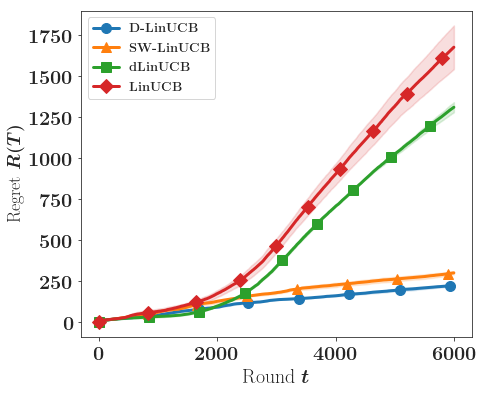

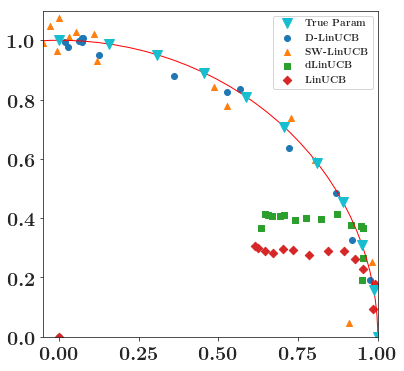

In [10]:
plot_regret(data_2, t_saved, filename = None, log=False, qtl=True, loc=2, font=13, bp = bp, bp_2 = {})
scatter_smooth(hat_2, None, true_2, loc=0, font=10, circle=True)

In [9]:
# Larger experiment with 100 repetitions
data, hat, true, time = data_from_experiment_smooth(n_mc=100, option = '')

  0%|          | 0/100 [00:00<?, ?it/s]

0 D-LinUCB [ 0.  0.] [ 1.  0.]
400 D-LinUCB [ 1.00240172  0.30487113] [ 0.9781476   0.20791169]
800 D-LinUCB [ 0.91169705  0.4679846 ] [ 0.91354546  0.40673664]
1200 D-LinUCB [ 0.82652247  0.55685019] [ 0.80901699  0.58778525]
1600 D-LinUCB [ 0.77642768  0.63677205] [ 0.66913061  0.74314483]
2000 D-LinUCB [ 0.65399518  0.72171851] [ 0.5        0.8660254]
2400 D-LinUCB [ 0.56640675  0.84509903] [ 0.30901699  0.95105652]
2800 D-LinUCB [ 0.2774789   0.96933754] [ 0.10452846  0.9945219 ]
3200 D-LinUCB [ 0.03135538  1.0664379 ] [  6.12323400e-17   1.00000000e+00]
3600 D-LinUCB [-0.00237726  1.06342934] [  6.12323400e-17   1.00000000e+00]
4000 D-LinUCB [ 0.05030068  1.04816767] [  6.12323400e-17   1.00000000e+00]
4400 D-LinUCB [-0.03339113  1.10141983] [  6.12323400e-17   1.00000000e+00]
4800 D-LinUCB [ 0.08828055  1.0265093 ] [  6.12323400e-17   1.00000000e+00]
5200 D-LinUCB [-0.00142996  1.02293916] [  6.12323400e-17   1.00000000e+00]
5600 D-LinUCB [ 0.00234646  1.01977379] [  6.12323400e-

  1%|          | 1/100 [00:12<20:44, 12.57s/it]

5600 LinUCB [ 0.60933136  0.54247743] [  6.12323400e-17   1.00000000e+00]


100%|██████████| 100/100 [20:29<00:00, 12.29s/it]

-- Building data out of the experiments ---
--- Data built ---


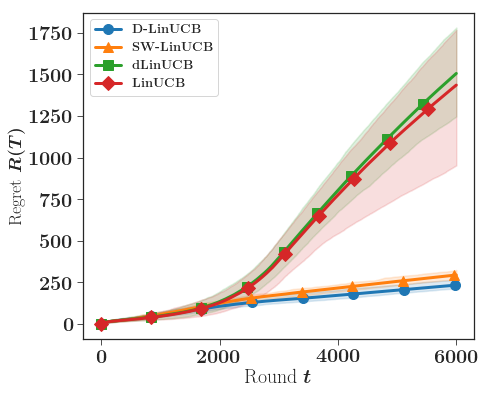

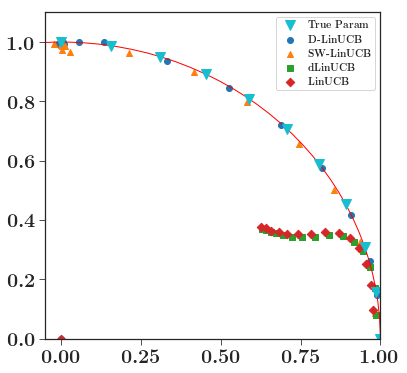

In [10]:
plot_regret(data, t_saved, filename = None, log=False, qtl=True, loc=2, font=13, bp = bp, bp_2 = {})
scatter_smooth(hat, None, true_2, loc=0, font=10, circle=True)

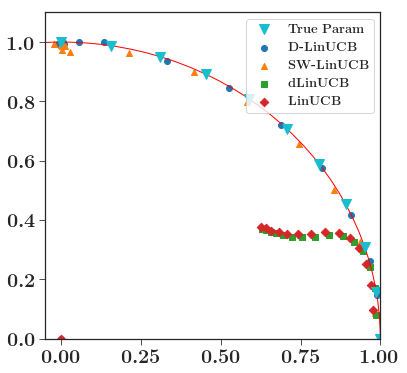

In [15]:
scatter_smooth(hat, None, true, loc=1, font=13, circle=True)

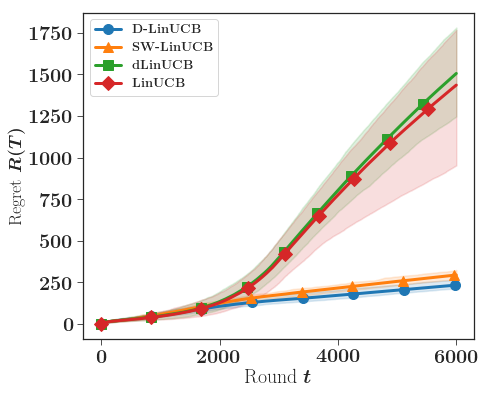

In [14]:
plot_regret(data, t_saved, filename = None, log=False, qtl=True, loc=2, font=13, bp = bp, bp_2 = {})